In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
%store -r totaldf
%store -r all_data

In [19]:
all_data

,Pb,P,ΔP,μob,μ,Tr
0,1225.381552,1225.381552,0.000000,2.373815,2.373815,365.150
1,1225.381552,1424.835725,199.454173,2.373815,2.403243,365.150
2,1225.381552,1624.289897,398.908346,2.373815,2.448862,365.150
3,1225.381552,1823.744070,598.362518,2.373815,2.497785,365.150
4,1225.381552,2023.198243,797.816691,2.373815,2.547933,365.150
...,...,...,...,...,...,...
15,4560.354725,7287.720024,2727.365299,0.578432,0.628829,388.706
16,4560.354725,7469.544377,2909.189653,0.578432,0.633035,388.706
17,4560.354725,7651.368730,3091.014006,0.578432,0.637304,388.706
18,4560.354725,7833.193084,3272.838359,0.578432,0.641632,388.706


In [20]:
x=all_data.copy()
        #Beal
mu1 = x['μob'] +(0.001*x['ΔP'])*(0.024*np.power(x['μob'] ,1.6)+0.038*np.power(x['μob'] ,0.56))
        #Kouzel
mu2 =x['μob']*np.exp((5.50318*np.power(10,-5.0)+3.77163*np.power(10,-5.0)*np.power(x['μob'],0.278))*x['ΔP'])
        #Vazquez and Beggs
mu3 = x['μob'] *np.power(x['P']/x['Pb'],2.6*np.power(x['P'],1.187)*np.power(10,-3.9*np.power(10,-5.0)*x['P']-5))
        #Khan
mu4 = x['μob'] *np.exp(9.6*np.power(10,-5.0)*x.ΔP)
        #Petrosky
PX1 = np.log10(x['μob'])
PX2 = -1.0146 +1.3322*PX1 -0.4876*np.power(PX1,2)-1.15036*np.power(PX1,3)
mu5 = x['μob']+1.3449*np.power(10,-3.0)*x.ΔP*np.power(10,PX2)
        #Kartoatmodjo and Schmidt 
mu6 = 1.00081*x['μob']  +1.127*np.power(10,-3.0)*x.ΔP*(-6.517*np.power(10,-3.0)*np.power(x['μob'] ,1.8148)+0.038*np.power(x['μob'] ,1.59))
        #Orbey and Sandler(average)
mu7 = x['μob']*np.exp(6.89*np.power(10,-5.0)*x.ΔP)
        #Kouzel modified
mu8 = x['μob']*np.exp((-2.34864*np.power(10,-5.0)+9.30705*np.power(10,-5.0)*np.power(x['μob'],0.181))*x.ΔP)
        #Hossain
mu9 = x['μob']+0.004481*x.ΔP*(0.555955*np.power(x['μob'],1.068099)-0.527737*np.power(x['μob'],1.063547))

In [21]:
 totaldf = pd.DataFrame({
            'P':x['P'],'μ':x['μ'],'Pb':x.Pb,'μob':x.μob,'ΔP':x.ΔP,'μ1':mu1, 'μ2':mu2, 'μ3':mu3,'μ4':mu4,'μ5':mu5, 'μ6': mu6, 'μ7':mu7, 'μ8':mu8, 'μ9':mu9
        })

In [22]:
totaldf

,P,μ,Pb,μob,ΔP,μ1,μ2,μ3,μ4,μ5,μ6,μ7,μ8,μ9
0,1225.381552,2.373815,1225.381552,2.373815,0.000000,2.373815,2.373815,2.373815,2.373815,2.373815,2.375738,2.373815,2.373815,2.373815
1,1424.835725,2.403243,1225.381552,2.373815,199.454173,2.405203,2.423084,2.419623,2.419706,2.434698,2.402473,2.406663,2.414571,2.441977
2,1624.289897,2.448862,1225.381552,2.373815,398.908346,2.436591,2.473376,2.473134,2.466484,2.495580,2.429208,2.439964,2.456026,2.510139
3,1823.744070,2.497785,1225.381552,2.373815,598.362518,2.467978,2.524711,2.533689,2.514167,2.556462,2.455943,2.473727,2.498193,2.578301
4,2023.198243,2.547933,1225.381552,2.373815,797.816691,2.499366,2.577112,2.600787,2.562771,2.617344,2.482678,2.507956,2.541085,2.646463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,7287.720024,0.628829,4560.354725,0.578432,2727.365299,0.681971,0.734183,0.737963,0.751558,0.744775,0.620398,0.698013,0.682770,0.761644
16,7469.544377,0.633035,4560.354725,0.578432,2909.189653,0.688873,0.745946,0.749969,0.764792,0.755865,0.623164,0.706812,0.690360,0.773858
17,7651.368730,0.637304,4560.354725,0.578432,3091.014006,0.695776,0.757898,0.762071,0.778259,0.766954,0.625930,0.715723,0.698035,0.786073
18,7833.193084,0.641632,4560.354725,0.578432,3272.838359,0.702678,0.770042,0.774255,0.791963,0.778044,0.628697,0.724745,0.705795,0.798287


In [23]:
def Stats_matrix(a):
    average_error = []
    standard_deviation = []
    absolute_average_error = []
    absolute_standard_deviation =[]
    for i in range(9):
        average_error.append(np.average((a.iloc[:,i+5]-a.μ)/a.μ*100))
        standard_deviation.append(np.std((a.iloc[:,i+5]-a.μ)/a.μ*100))
        absolute_average_error.append(np.average(np.absolute((a.iloc[:,i+5]-a.μ)/a.μ*100)))
        absolute_standard_deviation.append(np.std(np.absolute((a.iloc[:,i+5]-a.μ)/a.μ*100)))
    statistics  = pd.DataFrame(list(zip(average_error,standard_deviation,absolute_average_error,
                                        absolute_standard_deviation)),columns = ['% AE','% Std Dev AE','%AAE','% Std Dev AAE'],index = ['Beal(1946)','Kouzel(1965)','Vazquez and Beggs(1976)','Khan(1987)','Petrosky(1990)','Kartoatmodjo and Schmidt(1991)','Orbey and Sandler(1993)','Kouzel Modified(1997)','Hossain(2005)'])
    return statistics
Stats_matrix(totaldf)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Beal(1946),-1.760016,5.556010,3.510286,4.652397
Kouzel(1965),1.802383,6.974389,4.495824,5.628343
Vazquez and Beggs(1976),8.558374,17.146039,10.277795,16.174033
Khan(1987),1.620555,7.955382,5.105903,6.312214
Petrosky(1990),1.164120,22.916177,8.206682,21.427942
Kartoatmodjo and Schmidt(1991),-5.781872,7.155769,6.392714,6.615759
Orbey and Sandler(1993),-2.579124,6.924140,4.433493,5.910984
Kouzel Modified(1997),-1.700091,6.319086,4.043245,5.145225
Hossain(2005),4.272869,7.542966,6.019861,6.238190


In [24]:
visc_0_1 = totaldf.loc[(totaldf.μob<1) & (totaldf.μob>0)]
Stats_matrix(visc_0_1)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Beal(1946),-0.923943,5.065117,3.001110,4.183589
Kouzel(1965),1.455048,6.841564,4.233484,5.567923
Vazquez and Beggs(1976),6.179764,13.328986,8.110547,12.250321
Khan(1987),3.262646,7.700115,5.179247,6.565975
Petrosky(1990),5.354057,26.238925,6.722934,25.921985
Kartoatmodjo and Schmidt(1991),-7.225205,7.157441,7.274694,7.107136
Orbey and Sandler(1993),-0.795513,5.748657,3.309822,4.767072
Kouzel Modified(1997),-2.763842,6.082623,3.929505,5.403344
Hossain(2005),3.349809,7.210490,5.424730,5.812461


In [25]:
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
Stats_matrix(visc_1_5)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Beal(1946),-3.688661,5.603427,4.384910,5.077123
Kouzel(1965),2.656879,6.808664,4.531145,5.734599
Vazquez and Beggs(1976),12.608627,20.490079,13.415717,19.970963
Khan(1987),1.594984,6.345977,4.073291,5.120908
Petrosky(1990),2.717361,8.085762,5.714935,6.332702
Kartoatmodjo and Schmidt(1991),-5.186512,6.068548,5.541646,5.746073
Orbey and Sandler(1993),-2.733941,5.566889,3.945073,4.785507
Kouzel Modified(1997),-0.321422,5.880189,3.781007,4.514855
Hossain(2005),6.110440,7.610572,6.923986,6.878713


In [26]:
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
Stats_matrix(visc_5_20)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Beal(1946),-2.836417,5.829128,3.926811,5.157922
Kouzel(1965),2.619122,7.346781,5.446088,5.583468
Vazquez and Beggs(1976),12.714664,22.827075,14.158598,21.960695
Khan(1987),-2.774911,6.434290,4.802311,5.102747
Petrosky(1990),-15.597691,10.865417,15.597691,10.865417
Kartoatmodjo and Schmidt(1991),-1.691157,5.868904,3.986907,4.626945
Orbey and Sandler(1993),-7.344192,6.903952,7.660295,6.551457
Kouzel Modified(1997),0.885041,6.616484,4.691704,4.748587
Hossain(2005),6.247929,7.899500,7.452906,6.774431


In [27]:
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]
Stats_matrix(visc_20_plus)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Beal(1946),0.562193,7.650473,4.821135,5.966780
Kouzel(1965),-0.658803,7.908655,5.643105,5.579983
Vazquez and Beggs(1976),8.075273,20.472588,13.203721,17.606779
Khan(1987),-11.660588,8.283022,11.672071,8.266833
Petrosky(1990),-26.269275,14.489853,26.269275,14.489853
Kartoatmodjo and Schmidt(1991),1.396310,7.606947,4.940872,5.950051
Orbey and Sandler(1993),-16.192477,9.913951,16.192477,9.913951
Kouzel Modified(1997),-1.300600,7.727276,5.645861,5.433838
Hossain(2005),1.205117,7.484531,5.405286,5.315392


In [39]:
def UndersatErrorPlot(a):
    models =  ['Beal(1946)','Kouzel(1965)','Vazquez and Beggs(1976)','Khan(1987)','Petrosky(1990)','Kartoatmodjo and Schmidt(1991)','Orbey and Sandler(1993)','Kouzel Modified(1997)','Hossain(2005)']
    b = models.index(a)
    plt.scatter((totaldf.Pb),(totaldf.iloc[:,b+5]-totaldf.μ)/totaldf.μ*100,facecolors='none', edgecolors='b')
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Bubble point pressure(Psia)')
    plt.ylabel('% Error')
    plt.figure(figsize=(12,8))

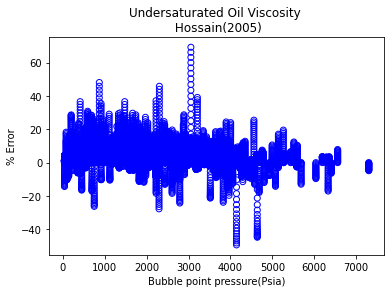

<Figure size 864x576 with 0 Axes>

In [50]:
UndersatErrorPlot('Hossain(2005)')

In [49]:
def UndersatViscPlot(a):
    models =  ['Beal(1946)','Kouzel(1965)','Vazquez and Beggs(1976)','Khan(1987)','Petrosky(1990)','Kartoatmodjo and Schmidt(1991)','Orbey and Sandler(1993)','Kouzel Modified(1997)','Hossain(2005)']
    b = models.index(a)
    plt.scatter(totaldf.μ,totaldf.iloc[:,b+5],facecolors ='none', edgecolors='b')
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Measured Viscosity(cp)')
    plt.ylabel('Calculated Viscosity(cp)')
    

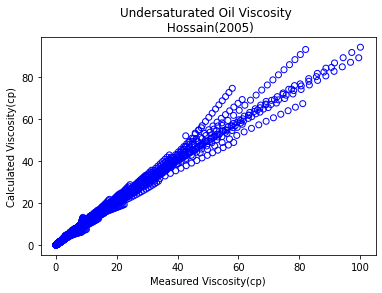

In [38]:
UndersatViscPlot('Hossain(2005)')

Text(0, 0.5, '% Average Absolute Error')

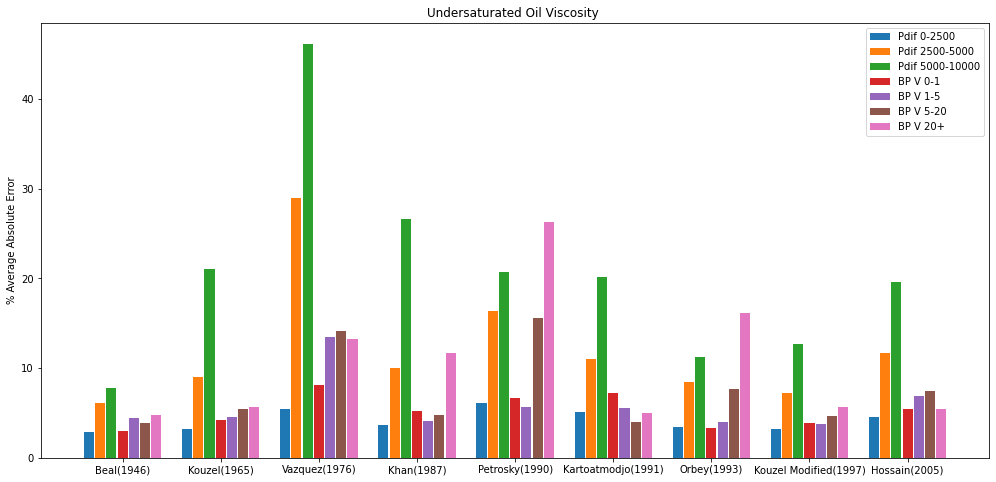

In [57]:
press_0_25 = totaldf.loc[(totaldf.ΔP<2500)]
press_25_50 = totaldf.loc[(totaldf.ΔP<5000)&(totaldf.ΔP>2500)]
press_50_100 = totaldf.loc[(totaldf.ΔP<10000)&(totaldf.ΔP>5000)]
visc_0_1 = totaldf.loc[(totaldf.μob>0) & (totaldf.μob<1)]
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]

full_data = {
    'Pdif 0-2500' : Stats_matrix(press_0_25).iloc[:,2],
    'Pdif 2500-5000' : Stats_matrix(press_25_50).iloc[:,2],
    'Pdif 5000-10000' : Stats_matrix(press_50_100).iloc[:,2],
    'BP V 0-1' : Stats_matrix(visc_0_1).iloc[:,2],
    'BP V 1-5' : Stats_matrix(visc_1_5).iloc[:,2],
    'BP V 5-20' : Stats_matrix(visc_5_20).iloc[:,2],
    'BP V 20+' : Stats_matrix(visc_20_plus).iloc[:,2],
}    
models =  ['Beal(1946)','Kouzel(1965)','Vazquez(1976)','Khan(1987)','Petrosky(1990)','Kartoatmodjo(1991)','Orbey(1993)','Kouzel Modified(1997)','Hossain(2005)']



%run my_bar_plot.ipynb
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (17, 8)
bar_plot(ax, full_data, total_width=.8, single_width=.9,)
plt.xticks(range(9), models)
plt.title('Undersaturated Oil Viscosity ')
plt.ylabel("% Average Absolute Error")

In [3]:
%store -r f2

In [4]:
f2

,0,1,2,3,4,5,6
0,3.409034,3.348506,3.518909,3.361407,3.265085,6.270819,5.832895
1,3.616748,3.526690,3.473812,3.454689,3.573033,6.636044,6.296834
2,3.248328,2.936079,3.053499,2.902109,2.973139,6.198313,6.998520
3,2.922339,2.751877,2.807114,2.673681,2.763306,6.465929,7.504930
4,3.318894,3.149337,3.118643,3.055160,3.451695,5.838647,8.392728
...,...,...,...,...,...,...,...
95,3.513576,3.572631,3.536577,3.464292,3.511452,7.466292,6.836990
96,3.089434,2.955905,3.075505,2.951720,3.038163,5.911786,5.101517
97,3.219538,3.046306,3.117209,3.025646,3.113683,6.105144,NaN
98,4.287495,4.184546,4.159062,4.128773,4.297505,7.138013,8.039306
